# Notebook "5_Besoin_2_Classifieur_EPA_Emission_vs_BDF"


## Description

Ce notebook est la mise en place de classifieurs, principalement avec l'algorithme LDA sur les données EPA "Emission" et "Bruit de fond". De plus, des classifieurs sur les données EPA "Emission" ont été mis en place sur ce notebook.

## Structure du notebook

Ce notebook est construit de plusieurs parties :
- I. Import des bibliothèques 
- II. Chargement des données
- III. Classifieurs LDA
- IV. Classifieurs entre les données bruit de fond et émission
- V. Etudes sur les données EPA emissions

## Prérequis

### Source de données

Pour que le notebook fonctionne, plusieurs bases de données sont utilisées :
- DB_EPA_BDF_normalized.csv
- DB_EPA_Emission_normalized.csv
- DB_EPA_merge_normalized.csv

### Installation des prérequis techniques

Le notebook fonctionne sur Python 3.7 avec les bibliothèques suivantes :
- pandas
- seaborn
- matplotlib
- numpy
- scipy
- sklearn

# I. Importation biliothèques

In [1]:
import pandas as pd
from math import floor
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patches as colormap
import numpy as np
from scipy import stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score #score evaluation 
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Fonction qui ajoute de la couleur à un tableau à partir d'une valeur
def color_false_red(val):
    color = 'red' if val == False else 'white'
    return 'color: %s' % color

# II. Mise en place des données

## II.a Chargement des données

In [3]:
df_epa_emission = pd.read_csv('DB_EPA_Emission_normalized.csv', sep=';')
df_epa_bdf = pd.read_csv('DB_EPA_BDF_normalized.csv', sep=';')
df_merge = pd.read_csv('DB_EPA_merge_normalized.csv', sep=';')

## II.b Chargement des variables

In [4]:
PCDD = ['2378-TCDD', '12378-PeCDD', '123478-HxCDD', '123678-HxCDD',
       '123789-HxCDD', '1234678-HpCDD', 'OCDD']

PCDF = ['2378-TCDF', '12378-PeCDF',
       '23478-PeCDF', '123478-HxCDF', '123678-HxCDF',
       '123789-HxCDF', '234678-HxCDF', '1234678-HpCDF', '1234789-HpCDF', 'OCDF']

PCDD_A = [sub + "_A" for sub in PCDD]
PCDF_A = [sub + "_A" for sub in PCDF]

In [5]:
list_columns_id = ["file", "test date", "run id", "source category", "source subcategory"]

substances = ['2378-TCDD', '12378-PeCDD', '123478-HxCDD', '123678-HxCDD',
       '123789-HxCDD', '1234678-HpCDD', 'OCDD', '2378-TCDF', '12378-PeCDF',
       '23478-PeCDF', '123478-HxCDF', '123678-HxCDF', '234678-HxCDF',
       '123789-HxCDF', '1234678-HpCDF', '1234789-HpCDF', 'OCDF']

total_homologue = ['Total TCDD', 'Total TCDF',
         'Total PCDD', 'Total PeCDF',
         'Total HxCDD', 'Total HxCDF',
         'Total HpCDD', 'Total HpCDF',
         'OCDD', 'OCDF']

total = ['Total DIOXINE', 'Total FURANE', 'Total DIOXINE FURANE']

In [6]:
PRO_A = [sub + '_A' for sub in substances]
PRO_C = [sub + '_C' for sub in substances]

# III. Classifieurs LDA

## III.a Normalisation A

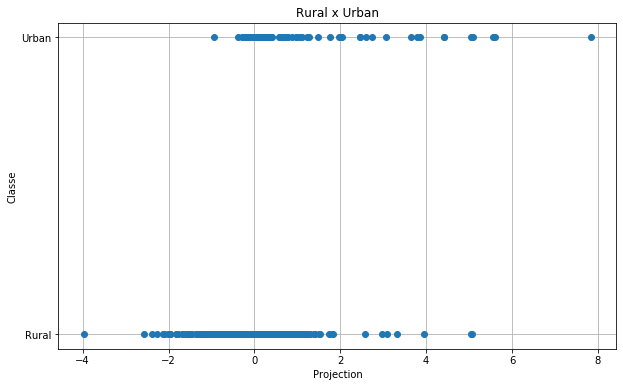

              precision    recall  f1-score   support

       Rural       0.89      0.98      0.93       484
       Urban       0.50      0.16      0.24        69

    accuracy                           0.88       553
   macro avg       0.70      0.57      0.59       553
weighted avg       0.84      0.88      0.85       553



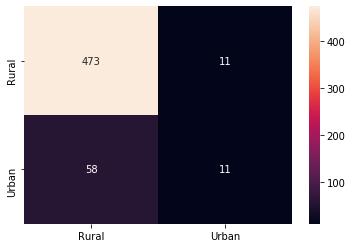

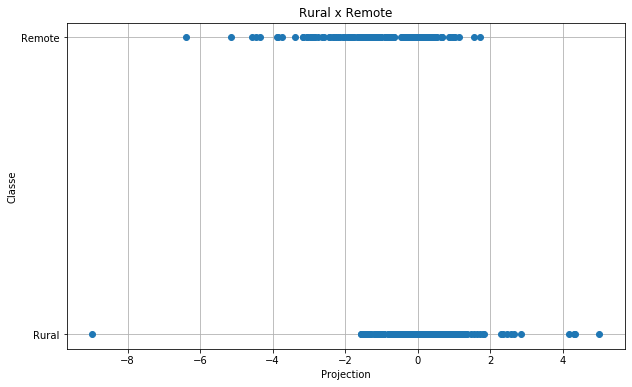

              precision    recall  f1-score   support

      Remote       0.59      0.28      0.38       131
       Rural       0.83      0.95      0.88       484

    accuracy                           0.80       615
   macro avg       0.71      0.61      0.63       615
weighted avg       0.78      0.80      0.78       615



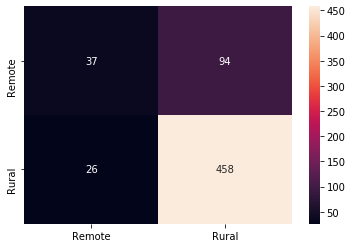

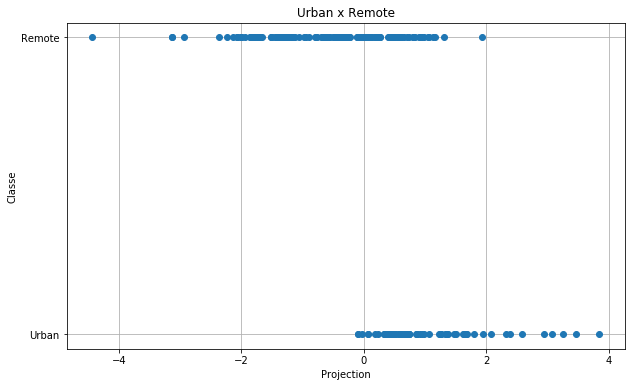

              precision    recall  f1-score   support

      Remote       0.78      0.78      0.78       131
       Urban       0.58      0.58      0.58        69

    accuracy                           0.71       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.71      0.71      0.71       200



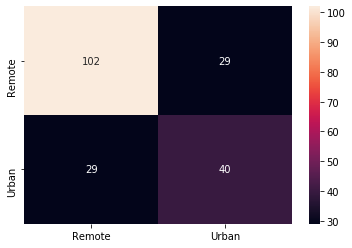

In [7]:
df_methodeA = df_epa_bdf.copy()
df_analyse_final = df_methodeA.copy()
list_areas = pd.unique(df_methodeA["Type"])
for (i, area_i) in enumerate(list_areas):
    for (j, area_j) in enumerate(list_areas):
        if (i < j):
            data = df_analyse_final[(df_analyse_final["Type"] == area_i) | (df_analyse_final["Type"] == area_j)]
            X = data[PRO_A]
            y = data["Type"]

            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1
            label_dict = {a : b for (a, b) in zip(pd.unique(y), pd.unique(data["Type"]))}

            sklearn_lda = LDA(n_components=len(pd.unique(y)) - 1)
            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            plt.figure(figsize=(10, 6))
            plt.plot(X_lda_sklearn, data["Type"], 'o')
            plt.title(area_i + " x " + area_j)
            plt.xlabel("Projection")
            plt.ylabel("Classe")
            plt.grid()
            plt.show()

            ax= plt.subplot()
            y_pred = cross_val_predict(sklearn_lda,X,y,cv=10)
            print(classification_report(y, y_pred, target_names=[label_dict[i] for i in sorted(label_dict.keys())]))
            sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='2.0f', ax = ax)
            ax.xaxis.set_ticklabels([label_dict[i] for i in sorted(label_dict.keys())])
            ax.yaxis.set_ticklabels([label_dict[i] for i in sorted(label_dict.keys())])

## III.b Normalisation C

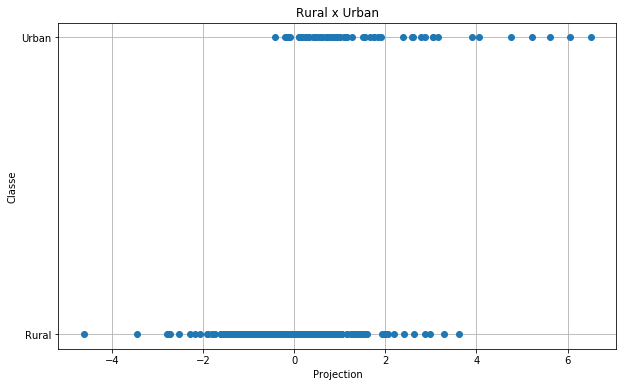

              precision    recall  f1-score   support

       Rural       0.90      0.97      0.93       469
       Urban       0.50      0.22      0.30        64

    accuracy                           0.88       533
   macro avg       0.70      0.59      0.62       533
weighted avg       0.85      0.88      0.86       533



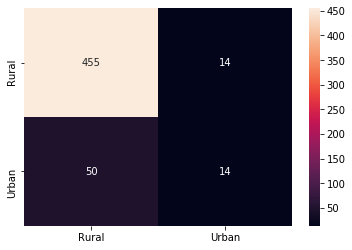

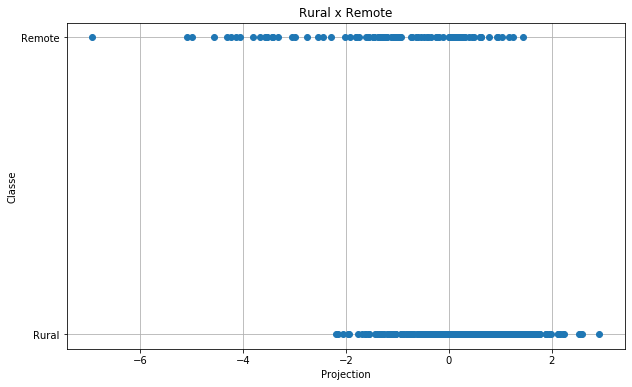

              precision    recall  f1-score   support

      Remote       0.49      0.22      0.30        95
       Rural       0.86      0.95      0.90       469

    accuracy                           0.83       564
   macro avg       0.67      0.59      0.60       564
weighted avg       0.80      0.83      0.80       564



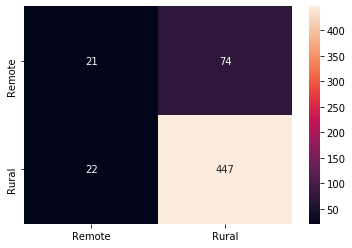

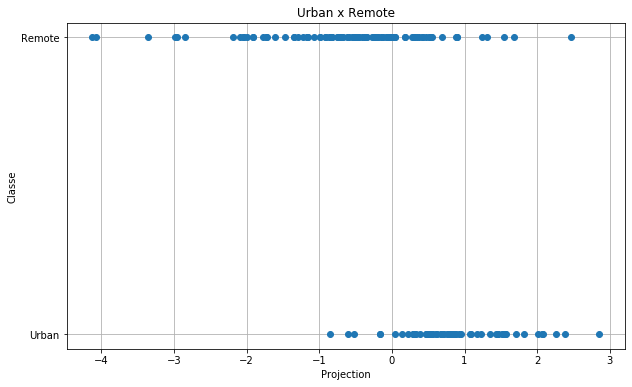

              precision    recall  f1-score   support

      Remote       0.76      0.73      0.74        95
       Urban       0.62      0.66      0.64        64

    accuracy                           0.70       159
   macro avg       0.69      0.69      0.69       159
weighted avg       0.70      0.70      0.70       159



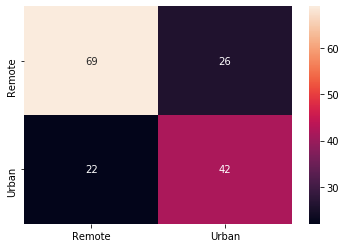

In [8]:
df_methodeC = df_epa_bdf.copy()
df_analyse_final = df_methodeC.dropna()
list_areas = pd.unique(df_analyse_final["Type"])
for (i, area_i) in enumerate(list_areas):
    for (j, area_j) in enumerate(list_areas):
        if (i < j):
            data = df_analyse_final[(df_analyse_final["Type"] == area_i) | (df_analyse_final["Type"] == area_j)]
            X = data[PRO_C]
            y = data["Type"]

            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1
            label_dict = {a : b for (a, b) in zip(pd.unique(y), pd.unique(data["Type"]))}
            sklearn_lda = LDA(n_components=len(pd.unique(y)) - 1)
            X_lda_sklearn = sklearn_lda.fit_transform(X, y)
            plt.figure(figsize=(10, 6))
            plt.plot(X_lda_sklearn, data["Type"], 'o')
            plt.title(area_i + " x " + area_j)
            plt.xlabel("Projection")
            plt.ylabel("Classe")
            plt.grid()
            plt.show()

            ax= plt.subplot()
            y_pred = cross_val_predict(sklearn_lda,X,y,cv=10)
            print(classification_report(y, y_pred, target_names=[label_dict[i] for i in sorted(label_dict.keys())]))
            sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='2.0f', ax = ax)
            ax.xaxis.set_ticklabels([label_dict[i] for i in sorted(label_dict.keys())])
            ax.yaxis.set_ticklabels([label_dict[i] for i in sorted(label_dict.keys())])

## III.c Normalisation A x C

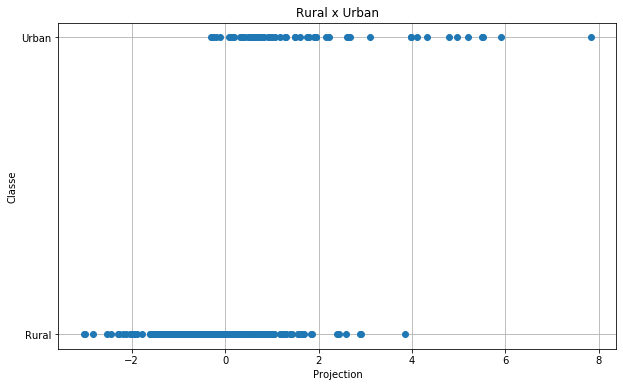

              precision    recall  f1-score   support

       Rural       0.90      0.96      0.93       469
       Urban       0.44      0.23      0.31        64

    accuracy                           0.87       533
   macro avg       0.67      0.60      0.62       533
weighted avg       0.85      0.87      0.85       533



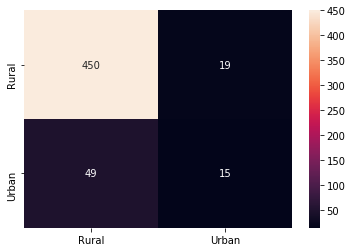

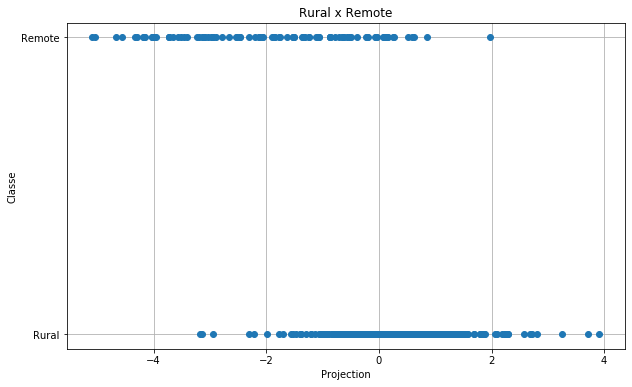

              precision    recall  f1-score   support

      Remote       0.62      0.38      0.47        95
       Rural       0.88      0.95      0.92       469

    accuracy                           0.86       564
   macro avg       0.75      0.67      0.69       564
weighted avg       0.84      0.86      0.84       564



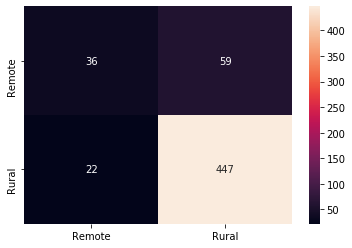

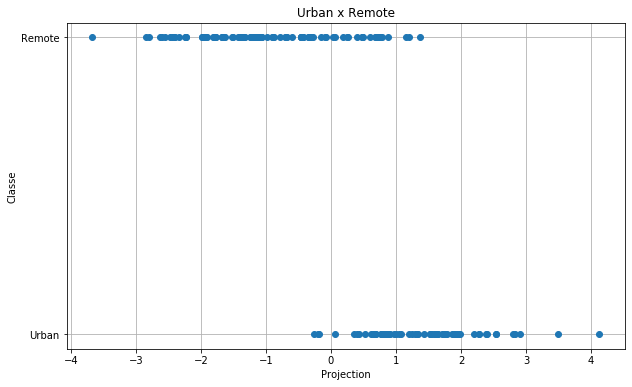

              precision    recall  f1-score   support

      Remote       0.85      0.66      0.75        95
       Urban       0.62      0.83      0.71        64

    accuracy                           0.73       159
   macro avg       0.74      0.75      0.73       159
weighted avg       0.76      0.73      0.73       159



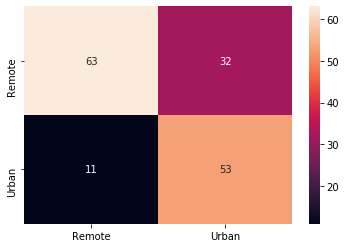

In [9]:
df_analyse_final = df_epa_bdf.dropna()
list_areas = pd.unique(df_analyse_final["Type"])
for (i, area_i) in enumerate(list_areas):
    for (j, area_j) in enumerate(list_areas):
        if (i < j):
            data = df_analyse_final[(df_analyse_final["Type"] == area_i) | (df_analyse_final["Type"] == area_j)]
            X = data[PRO_A + PRO_C]
            y = data["Type"]

            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1
            label_dict = {a : b for (a, b) in zip(pd.unique(y), pd.unique(data["Type"]))}
            sklearn_lda = LDA(n_components=len(pd.unique(y)) - 1)
            X_lda_sklearn = sklearn_lda.fit_transform(X, y)
            plt.figure(figsize=(10, 6))
            plt.plot(X_lda_sklearn, data["Type"], 'o')
            plt.title(area_i + " x " + area_j)
            plt.xlabel("Projection")
            plt.ylabel("Classe")
            plt.grid()
            plt.show()

            ax= plt.subplot()
            y_pred = cross_val_predict(sklearn_lda,X,y,cv=10)
            print(classification_report(y, y_pred, target_names=[label_dict[i] for i in sorted(label_dict.keys())]))
            sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='2.0f', ax = ax)
            ax.xaxis.set_ticklabels([label_dict[i] for i in sorted(label_dict.keys())])
            ax.yaxis.set_ticklabels([label_dict[i] for i in sorted(label_dict.keys())])

### LDA globale

In [10]:
X = df_analyse_final[PRO_A + PRO_C]
y = df_analyse_final["Type"]
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {i : area for i, area in enumerate(list_areas)}

sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

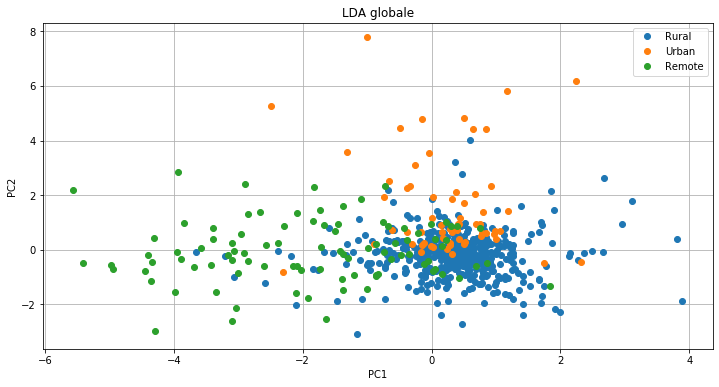

              precision    recall  f1-score   support

           1       0.61      0.39      0.47        95
           2       0.82      0.93      0.87       469
           3       0.37      0.20      0.26        64

    accuracy                           0.77       628
   macro avg       0.60      0.51      0.53       628
weighted avg       0.74      0.77      0.75       628



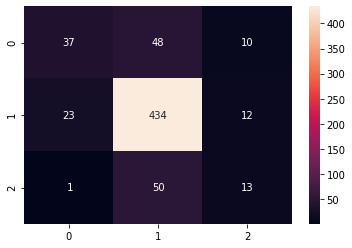

In [11]:
df_1 = []
df_2 = []
df_3 = []
plt.figure(figsize=(12, 6))
for (value, area) in zip(X_lda_sklearn, df_analyse_final["Type"]):
    if(area == "Rural"):
        df_1.append(list(value))
    elif(area == "Urban"):
        df_2.append(list(value))
    else:
        df_3.append(list(value))
plt.plot([i[0] for i in df_1], [i[1] for i in df_1], "o", label="Rural")
plt.plot([i[0] for i in df_2], [i[1] for i in df_2], "o", label="Urban")
plt.plot([i[0] for i in df_3], [i[1] for i in df_3], "o", label="Remote")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("LDA globale")
plt.grid()
plt.show()

y_pred = cross_val_predict(sklearn_lda,X,y,cv=10)
print(classification_report(y, y_pred))
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='2.0f')

# IV. Classification entre les données bruit de fond et émission

## IV.a Normalisation A

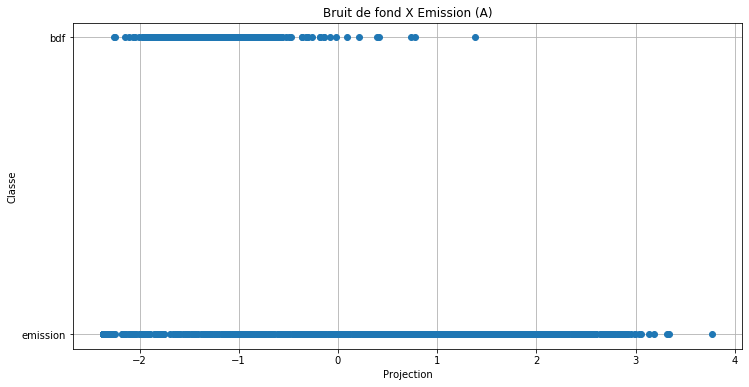

              precision    recall  f1-score   support

         bdf       0.79      0.96      0.87       684
    emission       0.98      0.85      0.91      1167

    accuracy                           0.89      1851
   macro avg       0.88      0.91      0.89      1851
weighted avg       0.91      0.89      0.89      1851



[Text(0, 0.5, 'bdf'), Text(0, 1.5, 'emission')]

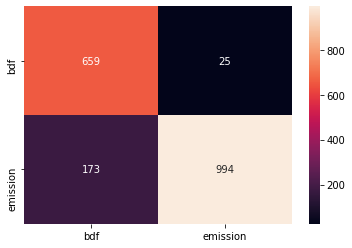

In [12]:
df_merge_final = df_merge[PRO_A + ["label"]]
df_merge_final = df_merge_final.dropna()
X = df_merge_final[PRO_A]
y = df_merge_final["label"]
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {i : area for i, area in zip(pd.unique(y), pd.unique(df_merge_final["label"]))}

sklearn_lda = LDA(n_components=1)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)
plt.figure(figsize=(12, 6))
plt.plot(X_lda_sklearn, df_merge_final["label"], 'o')
plt.title("Bruit de fond X Emission (A)")
plt.xlabel("Projection")
plt.ylabel("Classe")
plt.grid()
plt.show()
y_pred = cross_val_predict(sklearn_lda,X,y,cv=10)
print(classification_report(y, y_pred, target_names=[label_dict[i] for i in sorted(label_dict.keys())]))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='2.0f', ax = ax)
ax.xaxis.set_ticklabels([label_dict[i] for i in sorted(label_dict.keys())])
ax.yaxis.set_ticklabels([label_dict[i] for i in sorted(label_dict.keys())])

## IV.b Normalisation C

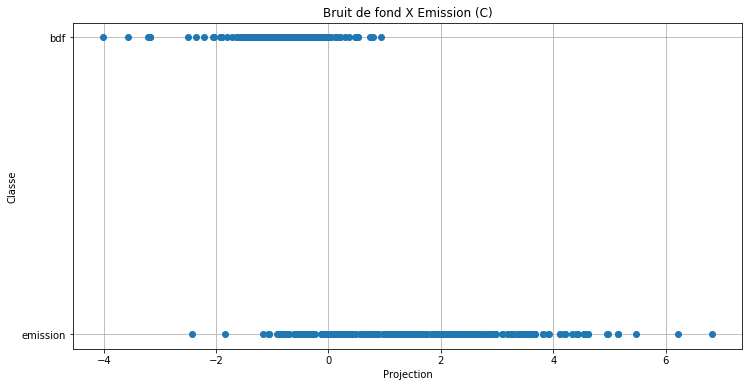

              precision    recall  f1-score   support

         bdf       0.84      0.99      0.91       628
    emission       0.98      0.59      0.73       290

    accuracy                           0.86       918
   macro avg       0.91      0.79      0.82       918
weighted avg       0.88      0.86      0.85       918



[Text(0, 0.5, 'bdf'), Text(0, 1.5, 'emission')]

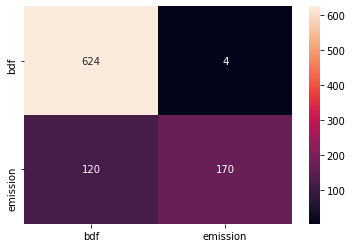

In [13]:
df_merge_final = df_merge[PRO_C + ["label"]]
df_merge_final = df_merge_final.dropna()
X = df_merge_final[PRO_C]
y = df_merge_final["label"]
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {i : area for i, area in zip(pd.unique(y), pd.unique(df_merge_final["label"]))}

sklearn_lda = LDA(n_components=1)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)
plt.figure(figsize=(12, 6))
plt.plot(X_lda_sklearn, df_merge_final["label"], 'o')
plt.title("Bruit de fond X Emission (C)")
plt.xlabel("Projection")
plt.ylabel("Classe")
plt.grid()
plt.show()
y_pred = cross_val_predict(sklearn_lda,X,y,cv=10)
print(classification_report(y, y_pred, target_names=[label_dict[i] for i in sorted(label_dict.keys())]))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='2.0f', ax = ax)
ax.xaxis.set_ticklabels([label_dict[i] for i in sorted(label_dict.keys())])
ax.yaxis.set_ticklabels([label_dict[i] for i in sorted(label_dict.keys())])

## IV.c Normalisations A et C

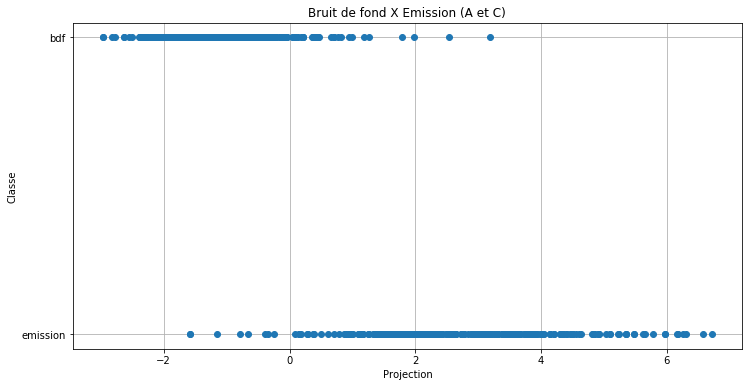

              precision    recall  f1-score   support

         bdf       0.95      0.98      0.97       628
    emission       0.96      0.89      0.92       290

    accuracy                           0.95       918
   macro avg       0.95      0.93      0.94       918
weighted avg       0.95      0.95      0.95       918



[Text(0, 0.5, 'bdf'), Text(0, 1.5, 'emission')]

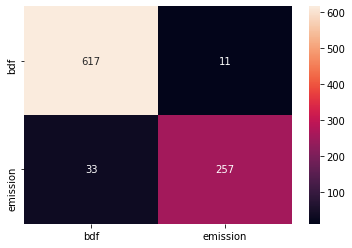

In [14]:
df_merge_final = df_merge[PRO_A + PRO_C + ["label"]]
df_merge_final = df_merge_final.dropna()
X = df_merge_final[PRO_A + PRO_C]
y = df_merge_final["label"]
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {i : area for i, area in zip(pd.unique(y), pd.unique(df_merge_final["label"]))}

sklearn_lda = LDA(n_components=1)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)
plt.figure(figsize=(12, 6))
plt.plot(X_lda_sklearn, df_merge_final["label"], 'o')
plt.title("Bruit de fond X Emission (A et C)")
plt.xlabel("Projection")
plt.ylabel("Classe")
plt.grid()
plt.show()
y_pred = cross_val_predict(sklearn_lda,X,y,cv=10)
print(classification_report(y, y_pred, target_names=[label_dict[i] for i in sorted(label_dict.keys())]))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='2.0f', ax = ax)
ax.xaxis.set_ticklabels([label_dict[i] for i in sorted(label_dict.keys())])
ax.yaxis.set_ticklabels([label_dict[i] for i in sorted(label_dict.keys())])

# V. Etudes sur les données EPA emissions

## V.a Classifieur personnalisé

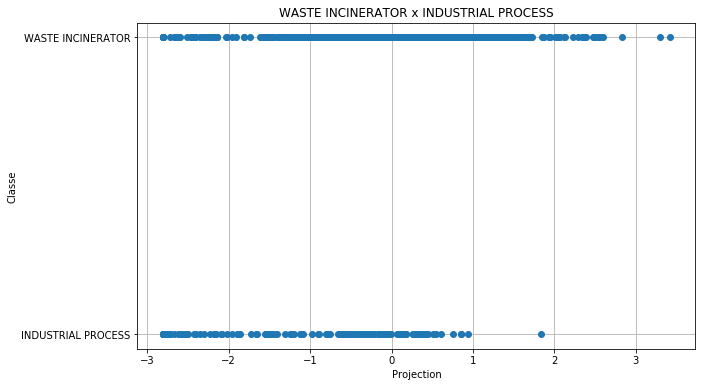

              precision    recall  f1-score   support

           1       0.38      0.15      0.21       157
           2       0.87      0.96      0.91       963

    accuracy                           0.85      1120
   macro avg       0.63      0.55      0.56      1120
weighted avg       0.80      0.85      0.82      1120



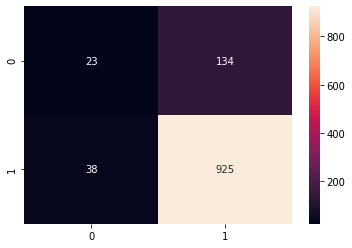

In [15]:
df_analyse_final = df_epa_emission.copy()
columns_analysis = PRO_A
list_source = pd.unique(df_epa_emission["source category"])

## CHOISIR LES SOURCES D'EMISSION
source_i = "WASTE INCINERATOR"
source_j = "INDUSTRIAL PROCESS"
## FIN CHOISIR LES SOURCES D'EMISSION

data = df_analyse_final[(df_analyse_final["source category"] == source_i) | (df_analyse_final["source category"] == source_j)][columns_analysis + ["source category"]].dropna()

X = data[columns_analysis]
y = data["source category"]

enc = LabelEncoder()
label_encoder = enc.fit(y)

y = label_encoder.transform(y) + 1
label_dict = {i:j for (i,j) in zip(pd.unique(y), pd.unique(label_encoder.inverse_transform(y - 1)))}

sklearn_lda = LDA(n_components=len(pd.unique(y)) - 1)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

plt.figure(figsize=(10, 6))
plt.plot(X_lda_sklearn, [label_dict[value] for value in y], 'o')
plt.title(source_i + " x " + source_j)
plt.xlabel("Projection")
plt.ylabel("Classe")
plt.grid()
plt.show()

y_pred = cross_val_predict(sklearn_lda,X,y,cv=10)
print(classification_report(y, y_pred))
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='2.0f')

## V.b Analyse sur "Source category" (normalisation A)

In [16]:
seuil = 0.8
result = []
df_analyse_final = df_epa_emission.copy()
list_source = pd.unique(df_epa_emission["source category"])
for (i, source_i) in enumerate(list_source):
    for (j, source_j) in enumerate(list_source):
        if (i < j):
            data = df_analyse_final[(df_analyse_final["source category"] == source_i) | (df_analyse_final["source category"] == source_j)][PRO_A + ["source category"]].dropna()

            X = data[PRO_A]
            y = data["source category"]

            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            
            y = label_encoder.transform(y) + 1
            label_dict = {i:j for (i,j) in zip(pd.unique(y), pd.unique(label_encoder.inverse_transform(y - 1)))}

            sklearn_lda = LDA(n_components=len(pd.unique(y)) - 1)
            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            y_pred = sklearn_lda.predict(X)

            prediction = classification_report(y, y_pred, output_dict=True)
            if (prediction["1"]["precision"] >= seuil and prediction["2"]["precision"] >= seuil and prediction["1"]["recall"] >= seuil and prediction["2"]["recall"] >= seuil):
                result.append([source_i, source_j, True])
            else:
                result.append([source_i, source_j, False])

In [17]:
result_final = result.copy()
for data in result:
    result_final.append([data[1], data[0], data[2]])

df_result = pd.DataFrame(columns=["Source 1", "Source 2", "Value"], data = result_final)
pd.pivot_table(df_result, values='Value', index='Source 1', columns='Source 2').style.applymap(color_false_red)

Source 2,INDUSTRIAL PROCESS,METAL SMELTING AND REFINING SOURCES,POWER / ENERGY GENERATION,PPM,WASTE INCINERATOR
Source 1,,,,,
INDUSTRIAL PROCESS,nan,True,False,False,False
METAL SMELTING AND REFINING SOURCES,True,nan,True,True,False
POWER / ENERGY GENERATION,False,True,nan,False,False
PPM,False,True,False,nan,False
WASTE INCINERATOR,False,False,False,False,nan


## V.c Analyse sur "Source subcategory" (normalisation A)

In [18]:
## SEUIL UTILISE SUR LA PRECISION ET LA SPECIFICITE
seuil = 0.8
## FIN SEUIL

result = []
df_analyse_final = df_epa_emission.copy()
list_source = pd.unique(df_epa_emission["source subcategory"])
for (i, source_i) in enumerate(list_source):
    for (j, source_j) in enumerate(list_source):
        if (i < j):
            data = df_analyse_final[(df_analyse_final["source subcategory"] == source_i) | (df_analyse_final["source subcategory"] == source_j)][PRO_A + ["source subcategory"]].dropna()

            X = data[PRO_A]
            y = data["source subcategory"]

            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            
            y = label_encoder.transform(y) + 1
            label_dict = {i:j for (i,j) in zip(pd.unique(y), pd.unique(label_encoder.inverse_transform(y - 1)))}

            sklearn_lda = LDA(n_components=len(pd.unique(y)) - 1)
            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            y_pred = sklearn_lda.predict(X)

            prediction = classification_report(y, y_pred, output_dict=True)
            if (prediction["1"]["precision"] >= seuil and prediction["2"]["precision"] >= seuil and prediction["1"]["recall"] >= seuil and prediction["2"]["recall"] >= seuil):
                result.append([source_i, source_j, True])
            else:
                result.append([source_i, source_j, False])

In [19]:
result_final = result.copy()
for data in result:
    result_final.append([data[1], data[0], data[2]])

df_result = pd.DataFrame(columns=["Source 1", "Source 2", "Value"], data = result_final)
pd.pivot_table(df_result, values='Value', index='Source 1', columns='Source 2').style.applymap(color_false_red)

Source 2,Cement Kilns,Coal Combustion,Crematoria,Hazardous Waste Incineration,Industrial Wood Combustion,Kraft Black Liquor - Bleached Chemical Wood Pulp and Paper Mills,Kraft Black Liquor Recovery Boilers,Medical Waste Incineration,Municipal Solid Waste Incineration,Petroleum Refining Catalyst Regeneration,Primary Ferrous Metal Sintering Plants,Secondary Nonferrous Metal Smelting,Secondary Nonferrous Metal Smelting : Aluminium,Sewage Sludge Incineration,Tire Combustion,WRS,Wastewater Sludge at Bleached Chemical Pulp Mills
Source 1,,,,,,,,,,,,,,,,,
Cement Kilns,nan,False,True,False,False,False,False,True,False,True,True,True,True,False,True,False,True
Coal Combustion,False,nan,True,False,True,True,True,False,False,True,True,True,True,False,False,True,True
Crematoria,True,True,nan,False,True,True,True,True,False,True,True,True,True,True,True,True,True
Hazardous Waste Incineration,False,False,False,nan,False,False,False,False,False,False,True,False,False,False,False,False,False
Industrial Wood Combustion,False,True,True,False,nan,False,False,True,False,True,True,True,True,False,True,False,True
Kraft Black Liquor - Bleached Chemical Wood Pulp and Paper Mills,False,True,True,False,False,nan,True,False,False,True,True,True,True,False,True,False,True
Kraft Black Liquor Recovery Boilers,False,True,True,False,False,True,nan,False,False,True,True,True,True,False,True,False,True
Medical Waste Incineration,True,False,True,False,True,False,False,nan,False,True,True,False,False,True,False,True,True
Municipal Solid Waste Incineration,False,False,False,False,False,False,False,False,nan,False,True,False,False,False,False,False,False


## V.c Analyse sur "Source category" (normalisation C)

In [20]:
seuil = 0.8
result = []
df_analyse_final = df_epa_emission.copy()
list_source = pd.unique(df_epa_emission["source category"])
for (i, source_i) in enumerate(list_source):
    for (j, source_j) in enumerate(list_source):
        if (i < j):
            data = df_analyse_final[(df_analyse_final["source category"] == source_i) | (df_analyse_final["source category"] == source_j)][PRO_C + ["source category"]].dropna()

            X = data[PRO_C]
            y = data["source category"]

            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            
            y = label_encoder.transform(y) + 1
            label_dict = {i:j for (i,j) in zip(pd.unique(y), pd.unique(label_encoder.inverse_transform(y - 1)))}

            sklearn_lda = LDA(n_components=len(pd.unique(y)) - 1)
            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            y_pred = sklearn_lda.predict(X)

            prediction = classification_report(y, y_pred, output_dict=True)
            if (prediction["1"]["precision"] >= seuil and prediction["2"]["precision"] >= seuil and prediction["1"]["recall"] >= seuil and prediction["2"]["recall"] >= seuil):
                result.append([source_i, source_j, True])
            else:
                result.append([source_i, source_j, False])

In [21]:
result_final = result.copy()
for data in result:
    result_final.append([data[1], data[0], data[2]])

df_result = pd.DataFrame(columns=["Source 1", "Source 2", "Value"], data = result_final)
pd.pivot_table(df_result, values='Value', index='Source 1', columns='Source 2').style.applymap(color_false_red)

Source 2,INDUSTRIAL PROCESS,METAL SMELTING AND REFINING SOURCES,POWER / ENERGY GENERATION,PPM,WASTE INCINERATOR
Source 1,,,,,
INDUSTRIAL PROCESS,nan,True,False,True,False
METAL SMELTING AND REFINING SOURCES,True,nan,True,True,False
POWER / ENERGY GENERATION,False,True,nan,True,False
PPM,True,True,True,nan,False
WASTE INCINERATOR,False,False,False,False,nan


## V.d Analyse sur "Source subcategory" (normalisation C)

In [22]:
seuil = 0.8
result = []
df_analyse_final = df_epa_emission.copy()
df_analyse_final = df_analyse_final[PRO_C + ["source subcategory"]].dropna()
list_source = pd.unique(df_analyse_final["source subcategory"])
for (i, source_i) in enumerate(list_source):
    for (j, source_j) in enumerate(list_source):
        if (i < j):
            data = df_analyse_final[(df_analyse_final["source subcategory"] == source_i) | (df_analyse_final["source subcategory"] == source_j)][PRO_C + ["source subcategory"]]

            X = data[PRO_C]
            y = data["source subcategory"]

            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            
            y = label_encoder.transform(y) + 1
            label_dict = {i:j for (i,j) in zip(pd.unique(y), pd.unique(label_encoder.inverse_transform(y - 1)))}

            sklearn_lda = LDA(n_components=len(pd.unique(y)) - 1)
            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            y_pred = sklearn_lda.predict(X)

            prediction = classification_report(y, y_pred, output_dict=True)
            if (prediction["1"]["precision"] >= seuil and prediction["2"]["precision"] >= seuil and prediction["1"]["recall"] >= seuil and prediction["2"]["recall"] >= seuil):
                result.append([source_i, source_j, True])
            else:
                result.append([source_i, source_j, False])

In [23]:
result_final = result.copy()
for data in result:
    result_final.append([data[1], data[0], data[2]])

df_result = pd.DataFrame(columns=["Source 1", "Source 2", "Value"], data = result_final)
pd.pivot_table(df_result, values='Value', index='Source 1', columns='Source 2').style.applymap(color_false_red)

Source 2,Cement Kilns,Coal Combustion,Crematoria,Hazardous Waste Incineration,Industrial Wood Combustion,Kraft Black Liquor - Bleached Chemical Wood Pulp and Paper Mills,Kraft Black Liquor Recovery Boilers,Medical Waste Incineration,Municipal Solid Waste Incineration,Petroleum Refining Catalyst Regeneration,Secondary Nonferrous Metal Smelting,Sewage Sludge Incineration,Tire Combustion,WRS,Wastewater Sludge at Bleached Chemical Pulp Mills
Source 1,,,,,,,,,,,,,,,
Cement Kilns,nan,True,True,True,True,True,True,False,False,True,True,True,True,True,True
Coal Combustion,True,nan,True,True,True,False,True,True,True,True,True,True,True,True,True
Crematoria,True,True,nan,True,True,True,True,True,True,True,True,True,True,True,True
Hazardous Waste Incineration,True,True,True,nan,True,True,True,True,True,True,True,True,True,True,True
Industrial Wood Combustion,True,True,True,True,nan,True,True,True,True,True,True,True,True,True,True
Kraft Black Liquor - Bleached Chemical Wood Pulp and Paper Mills,True,False,True,True,True,nan,True,True,True,True,True,True,True,True,True
Kraft Black Liquor Recovery Boilers,True,True,True,True,True,True,nan,True,False,True,True,True,True,True,True
Medical Waste Incineration,False,True,True,True,True,True,True,nan,False,True,True,True,True,True,True
Municipal Solid Waste Incineration,False,True,True,True,True,True,False,False,nan,True,False,False,True,True,True


## V.e Analyse sur "Source category" (normalisations A et C)

In [24]:
seuil = 0.8
result = []
df_analyse_final = df_epa_emission.copy()
df_analyse_final = df_analyse_final[PRO_A + PRO_C + ["source category"]].dropna()
list_source = pd.unique(df_analyse_final["source category"])
for (i, source_i) in enumerate(list_source):
    for (j, source_j) in enumerate(list_source):
        if (i < j):
            data = df_analyse_final[(df_analyse_final["source category"] == source_i) | (df_analyse_final["source category"] == source_j)][PRO_A + PRO_C + ["source category"]].dropna()

            X = data[PRO_A + PRO_C]
            y = data["source category"]

            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            
            y = label_encoder.transform(y) + 1
            label_dict = {i:j for (i,j) in zip(pd.unique(y), pd.unique(label_encoder.inverse_transform(y - 1)))}

            sklearn_lda = LDA(n_components=len(pd.unique(y)) - 1)
            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            y_pred = sklearn_lda.predict(X)

            prediction = classification_report(y, y_pred, output_dict=True)
            if (prediction["1"]["precision"] >= seuil and prediction["2"]["precision"] >= seuil and prediction["1"]["recall"] >= seuil and prediction["2"]["recall"] >= seuil):
                result.append([source_i, source_j, True])
            else:
                result.append([source_i, source_j, False])

In [25]:
result_final = result.copy()
for data in result:
    result_final.append([data[1], data[0], data[2]])

df_result = pd.DataFrame(columns=["Source 1", "Source 2", "Value"], data = result_final)
pd.pivot_table(df_result, values='Value', index='Source 1', columns='Source 2').style.applymap(color_false_red)

Source 2,INDUSTRIAL PROCESS,METAL SMELTING AND REFINING SOURCES,POWER / ENERGY GENERATION,PPM,WASTE INCINERATOR
Source 1,,,,,
INDUSTRIAL PROCESS,nan,True,True,True,False
METAL SMELTING AND REFINING SOURCES,True,nan,True,True,False
POWER / ENERGY GENERATION,True,True,nan,True,False
PPM,True,True,True,nan,True
WASTE INCINERATOR,False,False,False,True,nan


## Analyse sur "Source subcatecory" (normalisations A et C)

In [26]:
seuil = 0.8
result = []
df_analyse_final = df_epa_emission.copy()
df_analyse_final = df_analyse_final[PRO_A + PRO_C + ["source subcategory"]].dropna()
list_source = pd.unique(df_analyse_final["source subcategory"])
for (i, source_i) in enumerate(list_source):
    for (j, source_j) in enumerate(list_source):
        if (i < j):
            data = df_analyse_final[(df_analyse_final["source subcategory"] == source_i) | (df_analyse_final["source subcategory"] == source_j)][PRO_A + PRO_C + ["source subcategory"]].dropna()

            X = data[PRO_A + PRO_C]
            y = data["source subcategory"]

            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            
            y = label_encoder.transform(y) + 1
            label_dict = {i:j for (i,j) in zip(pd.unique(y), pd.unique(label_encoder.inverse_transform(y - 1)))}

            sklearn_lda = LDA(n_components=len(pd.unique(y)) - 1)
            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            y_pred = sklearn_lda.predict(X)

            prediction = classification_report(y, y_pred, output_dict=True)
            if (prediction["1"]["precision"] >= seuil and prediction["2"]["precision"] >= seuil and prediction["1"]["recall"] >= seuil and prediction["2"]["recall"] >= seuil):
                result.append([source_i, source_j, True])
            else:
                result.append([source_i, source_j, False])

In [27]:
result_final = result.copy()
for data in result:
    result_final.append([data[1], data[0], data[2]])

df_result = pd.DataFrame(columns=["Source 1", "Source 2", "Value"], data = result_final)
pd.pivot_table(df_result, values='Value', index='Source 1', columns='Source 2').style.applymap(color_false_red)

Source 2,Cement Kilns,Coal Combustion,Crematoria,Hazardous Waste Incineration,Industrial Wood Combustion,Kraft Black Liquor - Bleached Chemical Wood Pulp and Paper Mills,Kraft Black Liquor Recovery Boilers,Medical Waste Incineration,Municipal Solid Waste Incineration,Petroleum Refining Catalyst Regeneration,Secondary Nonferrous Metal Smelting,Sewage Sludge Incineration,Tire Combustion,WRS,Wastewater Sludge at Bleached Chemical Pulp Mills
Source 1,,,,,,,,,,,,,,,
Cement Kilns,nan,True,True,True,True,True,True,True,False,True,True,True,True,True,True
Coal Combustion,True,nan,False,True,True,False,True,True,True,True,True,True,True,True,True
Crematoria,True,False,nan,True,True,True,True,True,True,True,True,True,True,True,True
Hazardous Waste Incineration,True,True,True,nan,True,True,True,True,True,True,True,True,True,True,True
Industrial Wood Combustion,True,True,True,True,nan,True,True,True,True,True,True,True,True,True,True
Kraft Black Liquor - Bleached Chemical Wood Pulp and Paper Mills,True,False,True,True,True,nan,True,True,True,True,True,True,True,True,True
Kraft Black Liquor Recovery Boilers,True,True,True,True,True,True,nan,True,True,True,True,True,True,True,True
Medical Waste Incineration,True,True,True,True,True,True,True,nan,True,True,True,True,True,True,True
Municipal Solid Waste Incineration,False,True,True,True,True,True,True,True,nan,True,True,True,True,True,True


## V.g Classification globale

In [28]:
df_epa_emission_final = df_epa_emission[PRO_A + ["source category"]].dropna()
X = df_epa_emission_final[PRO_A]
y = df_epa_emission_final["source category"]
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {i : area for i, area in enumerate(list_areas)}

sklearn_lda = LDA(n_components=len(pd.unique(df_epa_emission["source category"])) - 1)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [29]:
label_dict

{0: 'Rural', 1: 'Urban', 2: 'Remote'}

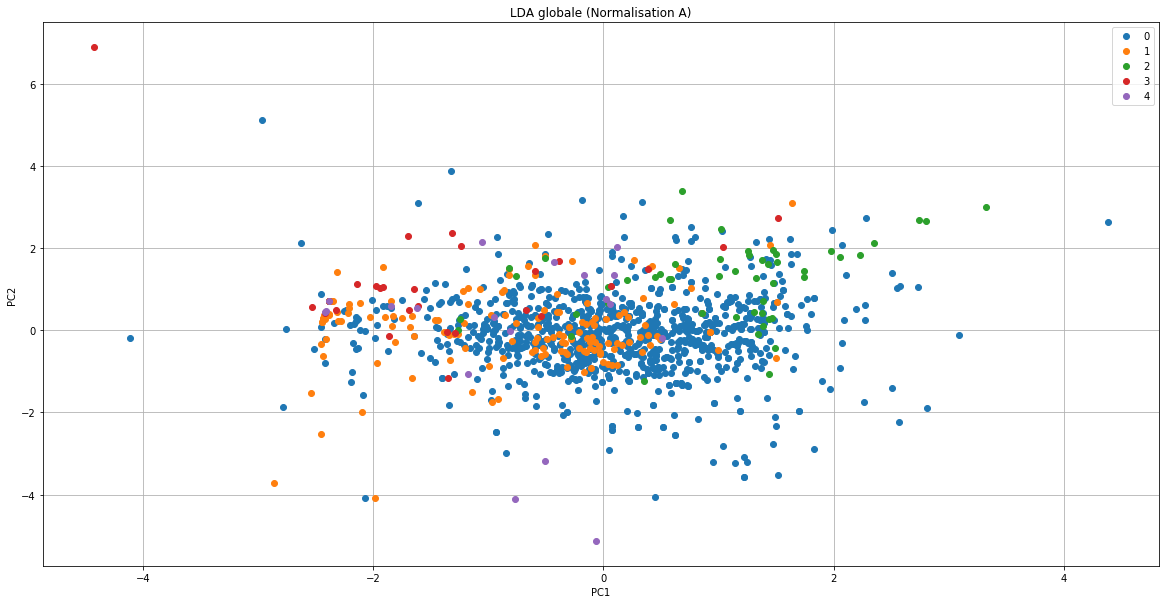

In [30]:
df_total = [[] for i in range(max(y))]
for (value, category) in zip(X_lda_sklearn, y):
    df_total[category - 1].append(value)

plt.figure(figsize=(20, 10))
for j in range(max(y)):
    plt.plot([i[0] for i in df_total[j-1]], [i[1] for i in df_total[j-1]], "o", label=str(j))

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("LDA globale (Normalisation A)")
plt.grid()
plt.show()

In [31]:
df_epa_emission_final = df_epa_emission[PRO_C + ["source category"]].dropna()
X = df_epa_emission_final[PRO_C]
y = df_epa_emission_final["source category"]
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {i : area for i, area in enumerate(list_areas)}

sklearn_lda = LDA(n_components=len(pd.unique(df_epa_emission["source category"])) - 1)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

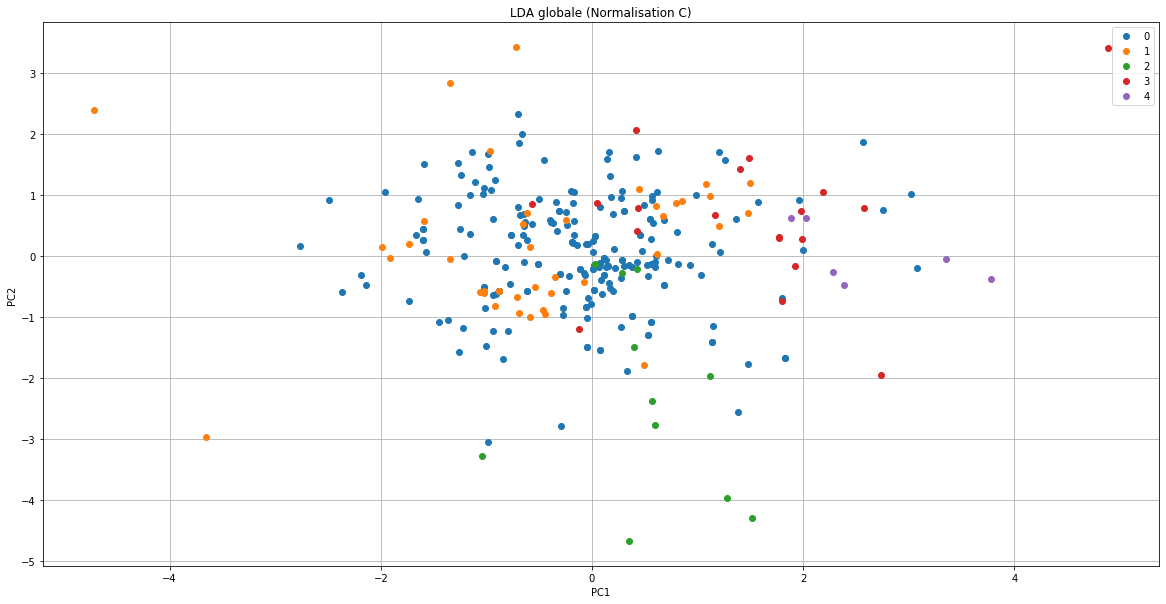

In [32]:
df_total = [[] for i in range(max(y))]
for (value, category) in zip(X_lda_sklearn, y):
    df_total[category - 1].append(value)

plt.figure(figsize=(20, 10))
for j in range(max(y)):
    plt.plot([i[0] for i in df_total[j-1]], [i[1] for i in df_total[j-1]], "o", label=str(j))

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("LDA globale (Normalisation C)")
plt.grid()
plt.show()

In [33]:
df_epa_emission_final = df_epa_emission[PRO_A + PRO_C + ["source category"]].dropna()
X = df_epa_emission_final[PRO_A + PRO_C]
y = df_epa_emission_final["source category"]
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {i : area for i, area in enumerate(list_areas)}

sklearn_lda = LDA(n_components=len(pd.unique(df_epa_emission["source category"])) - 1)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

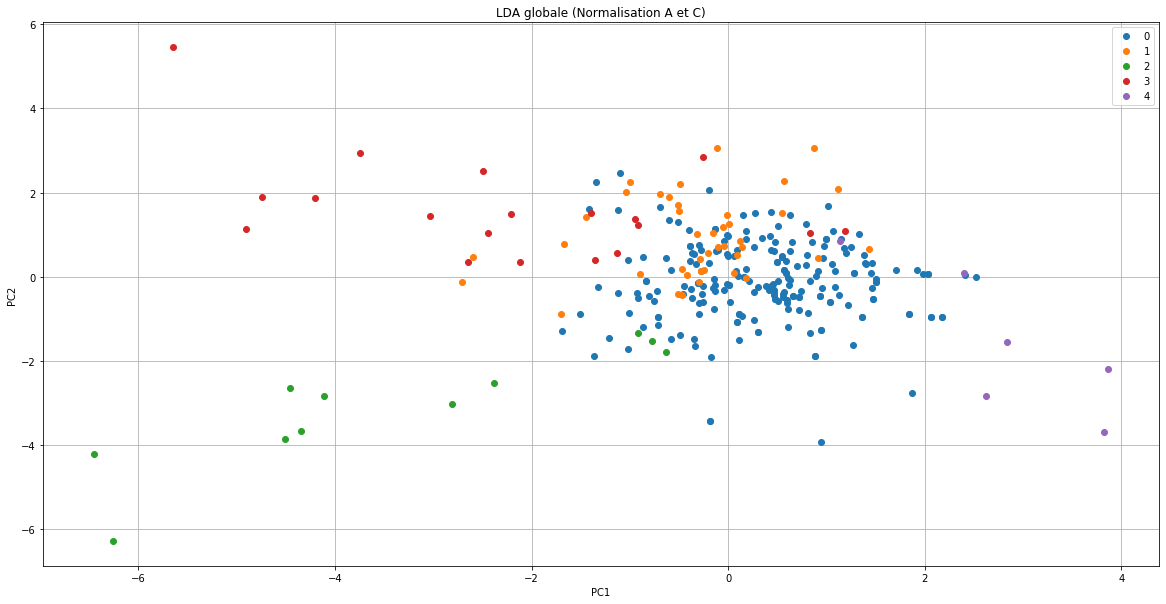

In [34]:
df_total = [[] for i in range(max(y))]
for (value, category) in zip(X_lda_sklearn, y):
    df_total[category - 1].append(value)

plt.figure(figsize=(20, 10))
for j in range(max(y)):
    plt.plot([i[0] for i in df_total[j-1]], [i[1] for i in df_total[j-1]], "o", label=str(j))

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("LDA globale (Normalisation A et C)")
plt.grid()
plt.show()

In [35]:
df_epa_emission_final = df_epa_emission[PRO_A + ["source subcategory"]].dropna()
X = df_epa_emission_final[PRO_A]
y = df_epa_emission_final["source subcategory"]
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y)
label_dict = {i : source for i, source in zip(list(pd.unique(y)), list(pd.unique(df_epa_emission_final["source subcategory"])))}

sklearn_lda = LDA(n_components=len(pd.unique(y)) - 1)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

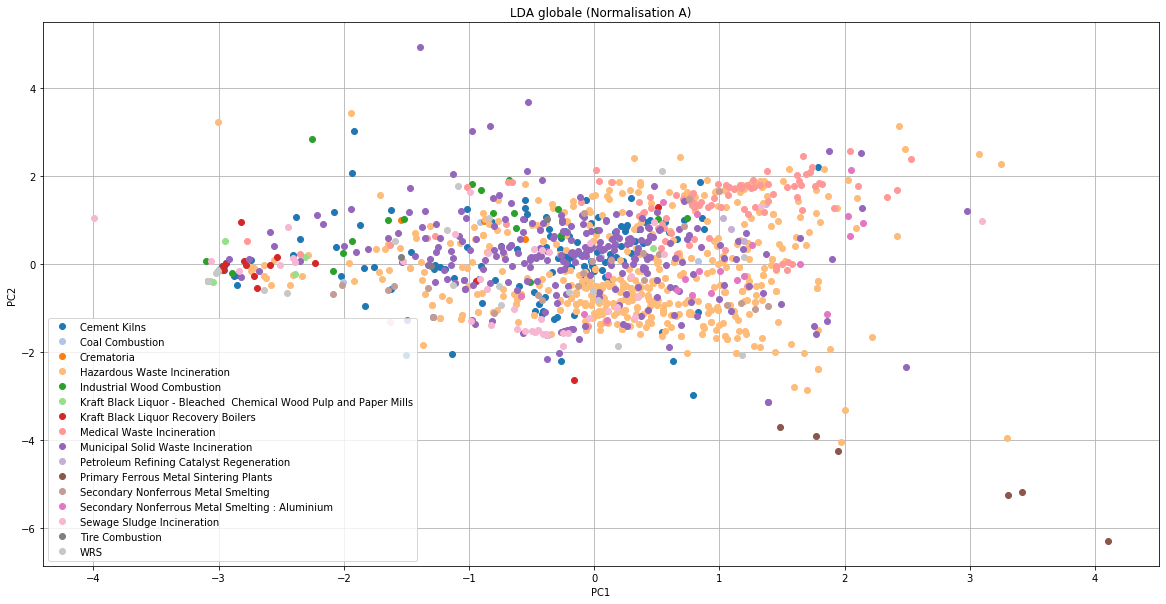

In [47]:
df_total = [[] for i in range(max(y))]
for (value, category) in zip(X_lda_sklearn, y):
    df_total[category - 1].append(value)

color = plt.get_cmap("tab20")

plt.figure(figsize=(20, 10))
for j in range(max(y)):
    plt.plot([i[0] for i in df_total[j-1]], [i[1] for i in df_total[j-1]],
        "o",
        label=label_encoder.inverse_transform([j])[0],
        color = color(j))

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("LDA globale (Normalisation A)")
plt.grid()
plt.show()